In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random
import pandas as pd
%matplotlib inline

In [44]:
def conv_forward(inputx, kernel_size, pad, filters, params = None):
    # inputx: (batch_number, channel ,height, weidth)
    N, C, H, W = inputx.shape # (2,1,3,3)
    if params is None:
        # np.random.randn (p1, p2, p3...pn) 参数代表维度数
        # standard normal distribution: A normal distribution with a mean of 0 and a standard deviation of 1 is called a standard normal distribution.
        w = np.random.randn(filters, C, kernel_size, kernel_size) # (3, 1, 3, 3)
        b = np.random.randn(filters)
    else:
        (w,b) = params
    
    x_pad = np.pad(inputx, ((0, 0), (0, 0), (pad, pad), (pad, pad)), mode='constant')
    x_pad_H,x_pad_W = x_pad.shape[2:] # padding 过后的 矩阵的 height, width
     
    
    # x_out的 维度可以通过公式计算得到： x_pad_H - kernel_size + 1
    # filters就是卷积核的厚度，该厚度 决定每个图片经过卷积层后的 厚度， 所有 x_out的厚度就是filters
    x_out = np.zeros((N, filters, x_pad_H - kernel_size + 1, x_pad_W - kernel_size + 1))
    
    for n in range(N): # batch_size i.e. sample numbers
        for f in range(filters): # 厚度， 每一个filter 都需要去和图片 做卷积
            for i in range(x_pad_H - kernel_size + 1):
                for j in range(x_pad_W - kernel_size + 1):
                    begin_x_cord = i
                    end_x_cord = i + kernel_size
                    begin_y_cord = j 
                    end_y_cord = j + kernel_size
                    # 在padding 之后的输入图片上抠出window
                    window = x_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord]
                    # window.shape: (1, 3, 3)
                    # w[f] shape: (1, 3, 3)
                    x_out[n,f,i,j] = np.sum(window * w[f]) + b[f]
    #print((N, filters, x_pad_H - kernel_size, x_pad_W - kernel_size))
    return x_out,(w,b)            
    
def conv_backword(x_input,dy,params,kernel_size,pad,filters):
    (w,b) = params
    x_pad = np.pad(x_input, ((0, 0), (0, 0), (pad, pad), (pad, pad)), 'constant')
    dx_pad = np.zeros_like(np.pad(x_input, ((0, 0), (0, 0), (pad, pad), (pad, pad)), 'constant'))
    N, C, H, W = x_input.shape
    x_pad_H,x_pad_W = x_pad.shape[2:]
    
    dx = np.zeros_like(x_input)
    print(dx.shape)
    dw = np.zeros_like(w)
    db = np.zeros_like(b)
    for n in range(N):       # ith image
        for f in range(filters):   # fth filter
            for i in range(x_pad_H - kernel_size + 1):
                for j in range(x_pad_W - kernel_size + 1):
                    begin_x_cord = i
                    end_x_cord = i + kernel_size
                    begin_y_cord = j 
                    end_y_cord = j + kernel_size
                    window = x_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord]
                    db[f] += dy[n, f, i, j]
                    dw[f] += dy[n, f, i, j] * window
                    dx_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord] += w[f] * dy[n, f, i, j]
    dx = dx_pad[:, :, pad:pad+H, pad:pad+W]
    return dx,(dw,db)

In [45]:
inputx = np.random.randn(2,1,3,3) # 2张图片， 1 个channel, 每张图片大小 3*3

In [47]:
# conv_forward(inputx, kernel_size, pad, filters, params = None):
conved_x,conv_param = conv_forward(inputx,3,1,3) # kernal_size =3, pad=1, filters =3
conved_x.shape, conv_param[0].shape, conv_param[1].shape


((2, 3, 3, 3), (3, 1, 3, 3), (3,))

In [49]:
dx,(dw,db) = conv_backword(inputx,2 * conved_x,conv_param,3,1,3)
dx.shape, dw.shape, db.shape

(2, 1, 3, 3)


((2, 1, 3, 3), (3, 1, 3, 3), (3,))

In [6]:
db

array([-20.41037571,  40.93582434, -69.00922082])

In [7]:
conv_param[1]

array([-0.8354836 ,  0.79793448, -1.23484886])

In [8]:
lr = 0.001
log = []
for i in range(3000):
    conved_x,_ = conv_forward(inputx,3,1,3,conv_param)
    dx,(dw,db) = conv_backword(inputx,2 * conved_x,conv_param,3,1,3)
    
    (w,b) = conv_param
    w -= dw * lr
    b -= db * lr
    
    loss = np.sum(conved_x * conved_x)
    log.append(loss)

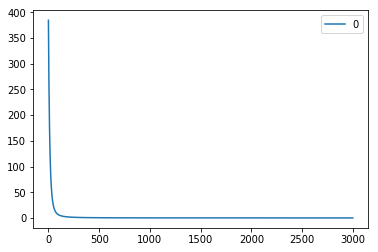

In [9]:
pd.DataFrame(log[:]).plot()

# NOW MAGIC TIME

In [10]:
def conv_forward(inputx,kernel_size,pad,filters,params = None):
    # inputx should be like (batch_number,channel,width,height)
    N, C, H, W = inputx.shape
    if params is None:
        w = np.random.randn(filters,C,kernel_size,kernel_size)
        b = np.random.randn(filters)
    else:
        (w,b) = params
    
    x_pad = np.pad(inputx, ((0, 0), (0, 0), (pad, pad), (pad, pad)), mode='constant')
    x_pad_H,x_pad_W = x_pad.shape[2:]
    
    
    x_out = np.zeros((N, filters, x_pad_H - kernel_size + 1, x_pad_W - kernel_size + 1))
    for n in range(N):
        for f in range(filters):
            for i in range(x_pad_H - kernel_size + 1):
                for j in range(x_pad_W - kernel_size + 1):
                    begin_x_cord = i
                    end_x_cord = i + kernel_size
                    begin_y_cord = j 
                    end_y_cord = j + kernel_size
                    window = x_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord]
                    x_out[n,f,i,j] = np.sum(window * w[f]) + b[f]
    #print((N, filters, x_pad_H - kernel_size, x_pad_W - kernel_size))
    return x_out,(w,b)            
    
def conv_backword(x_input,dy,params,kernel_size,pad,filters):
    (w,b) = params
    x_pad = np.pad(x_input, ((0, 0), (0, 0), (pad, pad), (pad, pad)), 'constant')
    dx_pad = np.zeros_like(np.pad(x_input, ((0, 0), (0, 0), (pad, pad), (pad, pad)), 'constant'))
    N, C, H, W = x_input.shape
    x_pad_H,x_pad_W = x_pad.shape[2:]
    
    dx = np.zeros_like(x_input)
    dw = np.zeros_like(w)
    db = np.zeros_like(b)
    for n in range(N):       # ith image
        for f in range(filters):   # fth filter
            for i in range(x_pad_H - kernel_size + 1):
                for j in range(x_pad_W - kernel_size + 1):
                    begin_x_cord = i
                    end_x_cord = i + kernel_size
                    begin_y_cord = j 
                    end_y_cord = j + kernel_size
                    window = x_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord]
                    db[f] += dy[n, f, i, j]
                    dw[f] += dy[n, f, i, j] * window
                    dx_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord] += w[f] * dy[n, f, i, j]
    dx = dx_pad[:, :, pad:pad+H, pad:pad+W]
    return dx,(dw,db)

In [11]:
import pickle
with open('../pre_CNN/xy.pkl','rb') as whdl:
    (IM_train,y_train,IM_test) = pickle.load(whdl)

In [12]:
IM_train[0].shape

(100, 100, 3)

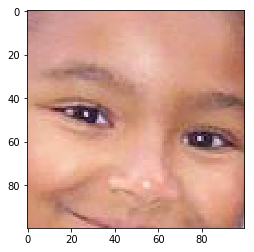

In [13]:
plt.imshow(IM_train[188])

In [14]:
target = np.expand_dims(np.transpose(IM_train[188],[2,0,1]),0)

In [15]:
target.shape

(1, 3, 100, 100)

In [16]:
inputx = np.random.randn(1,1,100,100)

In [17]:
target = target / 255

In [18]:
inputx = np.expand_dims(np.sum(target,axis=1),1)
inputx = inputx

In [19]:
conved_x,conv_param = conv_forward(inputx,1,0,3)
dx,(dw,db) = conv_backword(inputx,2 * conved_x,conv_param,1,0,3)

In [20]:
showimg = (conved_x - np.min(conved_x)) / (np.max(conved_x) - np.min(conved_x))

In [21]:
showimg.shape

(1, 3, 100, 100)

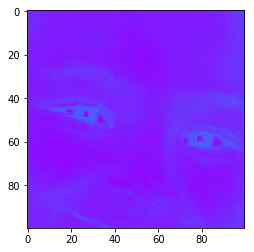

In [22]:
plt.imshow(np.transpose(showimg[0],[1,2,0]))

In [23]:
lr = 0.1
log = []
norm = len(inputx.reshape(-1))
for i in range(100):
    conved_x,_ = conv_forward(inputx,1,0,3,conv_param)
    dx,(dw,db) = conv_backword(inputx,(2 * conved_x - 2 * target) / norm,conv_param,1,0,3)
    
    (w,b) = conv_param
    w -= dw * lr
    b -= db * lr
    
    loss = np.sum((target - conved_x) *(target -  conved_x))  / norm
    log.append(loss)
    print(i,loss)

0 19.61283870829971
1 0.21763474766912513
2 0.19264415163532697
3 0.19090455591705505
4 0.18920819138997969
5 0.18752708154608178
6 0.18586105641058376
7 0.18420998058807106
8 0.18257371993768792
9 0.18095214152227773
10 0.17934511359753438
11 0.17775250560129918
12 0.17617418814295288
13 0.17461003299290376
14 0.17305991307216956
15 0.17152370244205298
16 0.17000127629390996
17 0.1684925109390096
18 0.16699728379848502
19 0.1655154733933748
20 0.1640469593347531
21 0.16259162231394916
22 0.16114934409285364
23 0.15972000749431287
24 0.1583034963926086
25 0.1568996957040234
26 0.15550849137749104
27 0.15412977038533002
28 0.1527634207140611
29 0.1514093313553066
30 0.15006739229677155
31 0.1487374945133061
32 0.1474195299580474
33 0.14611339155364172
34 0.14481897318354486
35 0.14353616968340072
36 0.14226487683249742
37 0.14100499134529987
38 0.1397564108630584
39 0.13851903394549264
40 0.13729276006255
41 0.13607748958623841
42 0.13487312378253177
43 0.13367956480334864
44 0.13249671

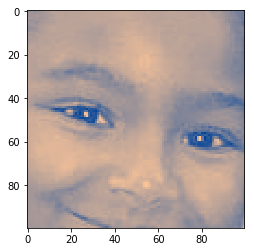

In [26]:
resultimg = (conved_x - np.min(conved_x)) / (np.max(conved_x) - np.min(conved_x))
resultimg = resultimg
plt.imshow(np.transpose(resultimg[0],[1,2,0]))

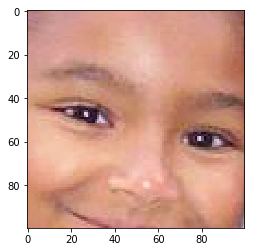

In [27]:
resultimg = (target - np.min(target)) / (np.max(target) - np.min(target))
plt.imshow(np.transpose(resultimg[0],[1,2,0]))